In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/Used Car Price/train-data.csv')
test_data = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/Used Car Price/test-data.csv')

In [3]:
test_data = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/Used Car Price/test-data.csv')

In [4]:
train_data.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [5]:
train_data.tail(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


<h3>Shape of the data</h3>

In [6]:
print('Number of rows present :',train_data.shape[0])
print('Number of columns present :',train_data.shape[1])

Number of rows present : 6019
Number of columns present : 14


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<h3>Counting the null values in the dataset</h3>

In [8]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
train_data = train_data.drop('Unnamed: 0',axis=1)

In [10]:
train_data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [11]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<h3>Looking for the unique values of Categorical feature</h3>

In [12]:
print('Total unique brand of cars are',train_data['Name'].nunique())
print(train_data['Name'].unique())

print('Total unique locations are',train_data['Location'].nunique())
print(train_data['Location'].unique())


print('Total unique Fuel_Type are',train_data['Fuel_Type'].nunique())
print(train_data['Fuel_Type'].unique())

print('Total unique Transmission are',train_data['Transmission'].nunique())
print(train_data['Transmission'].unique())

print('Total unique Owner_Type are',train_data['Owner_Type'].nunique())
print(train_data['Owner_Type'].unique())


Total unique brand of cars are 1876
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
Total unique locations are 11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Total unique Fuel_Type are 5
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Total unique Transmission are 2
['Manual' 'Automatic']
Total unique Owner_Type are 4
['First' 'Second' 'Fourth & Above' 'Third']


<h3>Missing data handling</h3>

In [13]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [14]:
train_data = train_data[train_data['Mileage'].notna()]
train_data = train_data[train_data['Engine'].notna()]
train_data = train_data[train_data['Power'].notna()]
train_data = train_data[train_data['Seats'].notna()]

In [15]:
train_data.shape

(5975, 13)

In [16]:
train_data = train_data.reset_index(drop=True)

<h3>Feature Engineering</h3>

In [17]:
for i in range(train_data.shape[0]):
    train_data.at[i,'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i,'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i,'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i,'Power(bhp)'] = train_data['Power'][i].split()[0]

In [18]:
train_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Company               object
Mileage(km/kg)        object
Engine(CC)            object
Power(bhp)            object
dtype: object

In [19]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [20]:
train_data[train_data['Power(bhp)']=='null'].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00,Ford,17.8,1399.0,null
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30,Hyundai,0.0,1086.0,null
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10,Hyundai,17.0,1086.0,null
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85,Hyundai,17.0,1086.0,null
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67,Hyundai,17.0,1086.0,null


In [21]:
x = 'no'
count = 0
index = []
for i in range(train_data.shape[0]):
    if  train_data['Power(bhp)'][i] == 'null':
        x = 'yes'
        count = count+1
        index.append(i)
        
print(x)
print(count)
print(index)

yes
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [22]:
train_data = train_data.drop(train_data.index[index])
train_data = train_data.reset_index(drop=True)

<h4>Shape of new data</h4>

In [23]:
train_data.shape

(5872, 17)

In [24]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [25]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [26]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [27]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

<h4>Deleting all useless features</h4>

In [28]:
train_data.drop(['Name','Mileage','Engine','Power','New_Price'],axis=1,inplace=True)

In [29]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


<h3>Data Visualization</h3>

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


<h3>1. Year</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

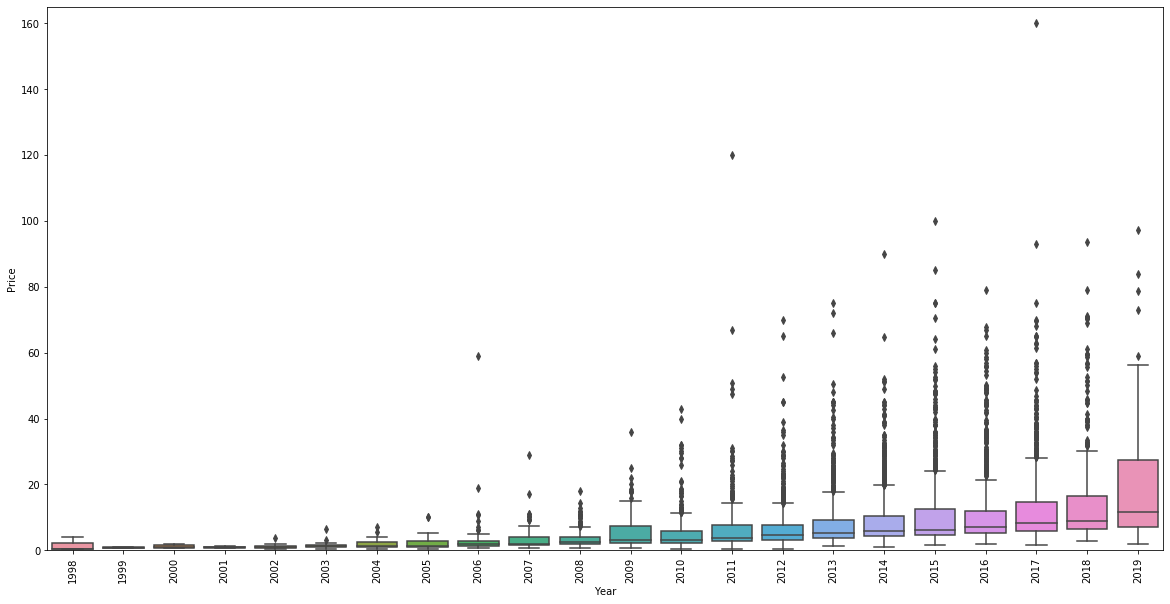

In [31]:
var = 'Year'
data = pd.concat([train_data['Price'],train_data[var]],axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var,y='Price',data=data)
fig.axis(ymin=0,ymax=165)
plt.xticks(rotation=90)

<h4>Prices of new model is high in comparision to old models</h4>

<h3>2. Seats</h3>

In [32]:
train_data.Seats.value_counts()

5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

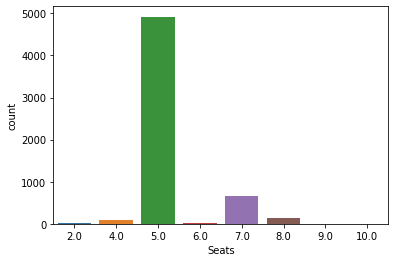

In [33]:
sns.countplot(x='Seats',data=train_data)

<h3>3. Price</h3> 

(0, 160)

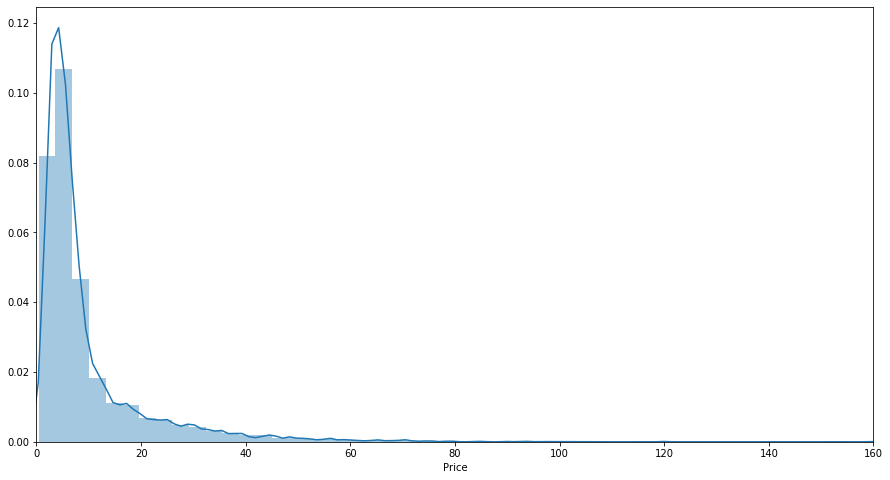

In [34]:
f,ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

<h3>4. Fuel Type</h3> 

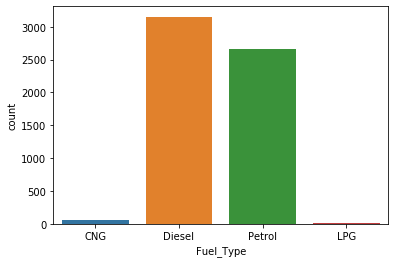

In [35]:
sns.countplot(x='Fuel_Type',data=train_data)

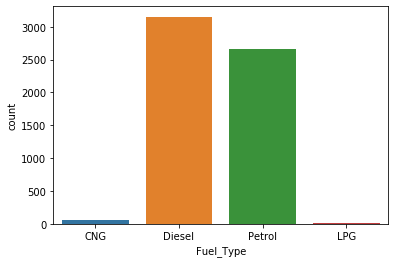

In [36]:
sns.countplot(x='Fuel_Type',data=train_data)

<h3>5. Transmission</h3>

In [37]:
train_data.Transmission.value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

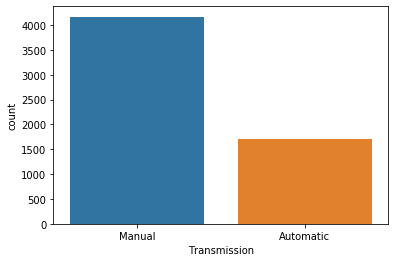

In [38]:
sns.countplot(x='Transmission',data=train_data)

<h3>6. Owner</h3>

In [39]:
train_data.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

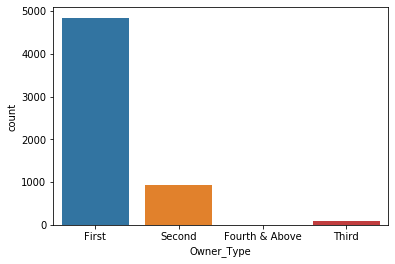

In [40]:
sns.countplot(x='Owner_Type',data=train_data)

<h3>7. Company</h3>

Text(0, 0.5, 'Count of cars')

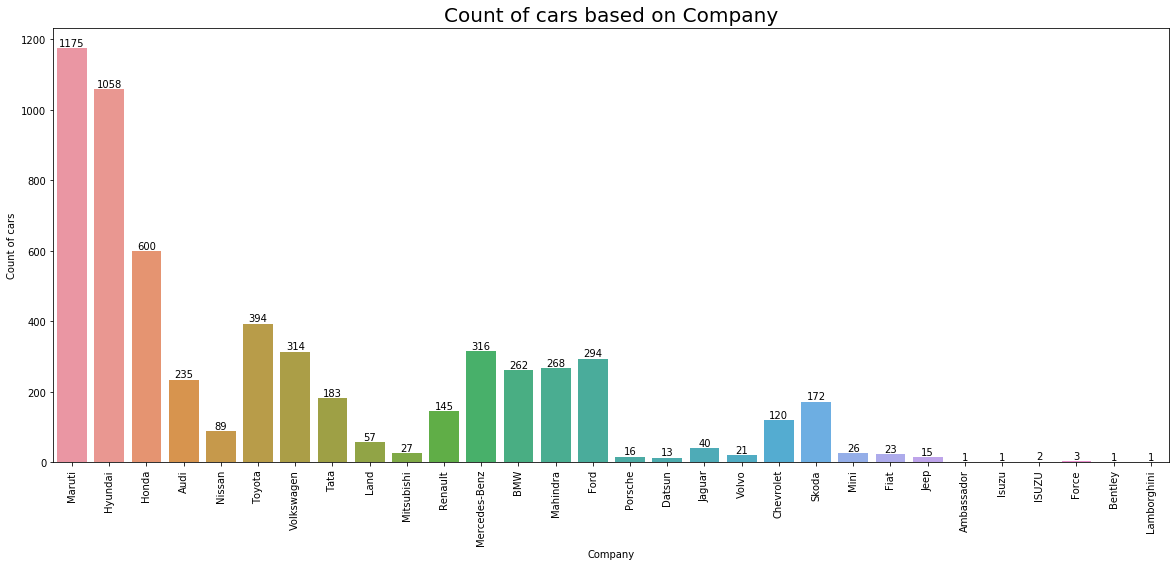

In [41]:
plt.figure(figsize=(20,8))
plot = sns.countplot(x='Company',data=train_data)
plt.xticks(rotation=90)
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2.0,
                 i.get_height()),
                 ha = 'center',
                 va='center',
                 xytext=(0,5),
                 textcoords = 'offset points')
    
plt.title('Count of cars based on Company',fontsize=20)
plt.xlabel('Company')
plt.ylabel('Count of cars')

Text(0.5, 1.0, 'Price distribution according to the sales location of the car')

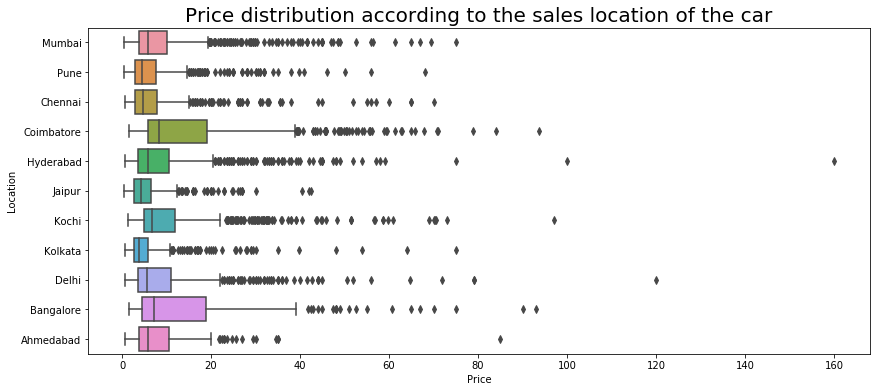

In [42]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Price',y='Location',data=train_data)
plt.title("Price distribution according to the sales location of the car", fontsize=20,ha='center')

Text(0.5, 1.0, 'Price distribution according to the transmission type of the car')

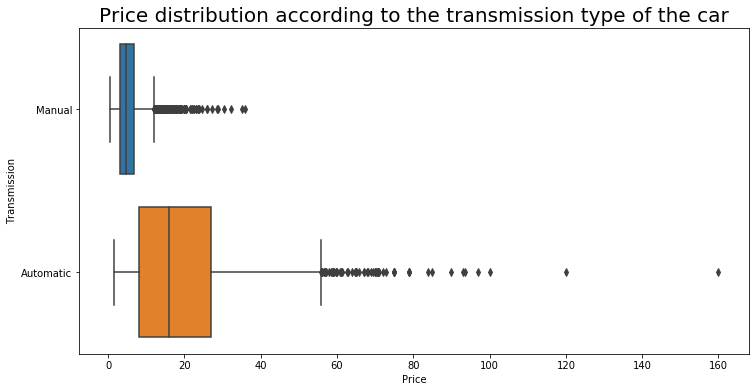

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Price',y='Transmission',data=train_data)
plt.title("Price distribution according to the transmission type of the car", fontsize=20,ha='center')

Text(0.5, 1.0, 'Prices of the cars as per the year of sales')

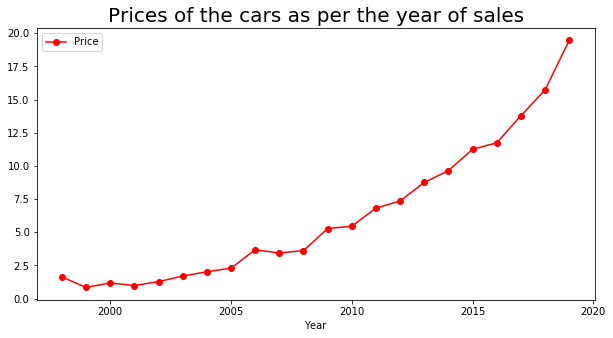

In [44]:
axis = train_data.groupby('Year')[['Price']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Prices of the cars as per the year of sales", fontsize=20,ha='center')

Text(0.5, 1.0, 'Kilometers driven over the course of years')

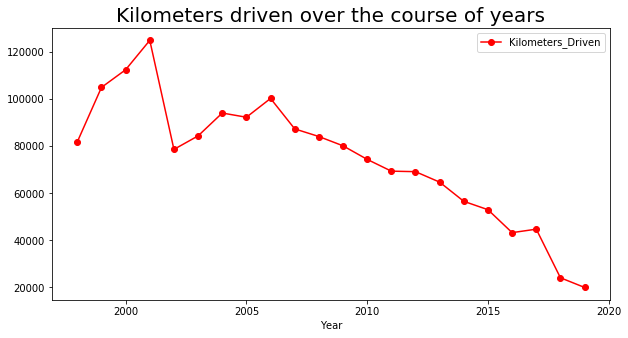

In [45]:
axis = train_data.groupby('Year')[['Kilometers_Driven']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Kilometers driven over the course of years", fontsize=20,ha='center')

Text(0.5, 1.0, 'Price v/s No. of seats')

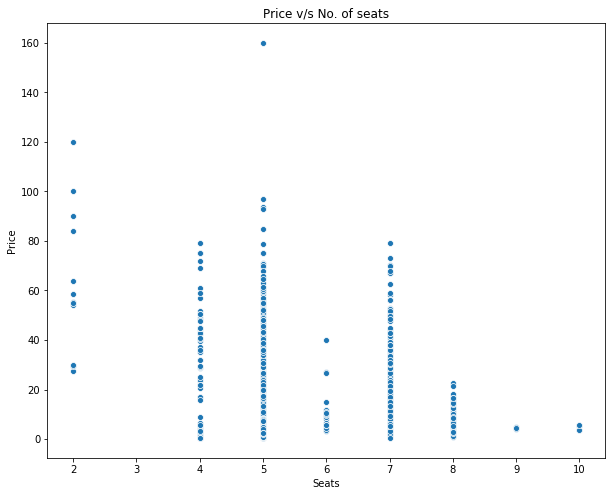

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Seats', y='Price',data=train_data)
plt.title('Price v/s No. of seats')

Text(0.5, 1.0, 'Price v/s No. of Kilometers Driven')

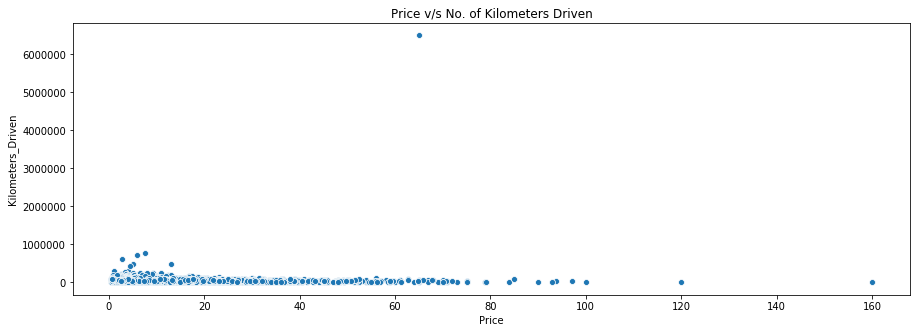

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Price', y='Kilometers_Driven',data=train_data)
plt.title('Price v/s No. of Kilometers Driven')

<h3>Working with Categorical Data</h3>

In [48]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [49]:
location = pd.get_dummies(train_data['Location'],drop_first=True,prefix='Location')
location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [50]:
Fuel_Type = pd.get_dummies(train_data['Fuel_Type'],drop_first=True,prefix='Fuel_Type')
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [51]:
Transmission = pd.get_dummies(train_data['Transmission'],drop_first=True,prefix='Transmission')
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [52]:
train_data.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [53]:
train_data.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace=True)

In [54]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [55]:
train_data.Company.value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Lamborghini         1
Bentley             1
Name: Company, dtype: int64

In [56]:
train_data.drop('Company',axis=1,inplace=True)

<h4>Merge the dummy data</h4>

In [57]:
final_data = pd.concat([train_data,location,Fuel_Type,Transmission],axis=1)
final_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
final_data.drop(['Location','Fuel_Type','Transmission','New_car_Price'],axis=1,inplace=True)
final_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
final_data.shape

(5872, 22)

<h3>Prepare Test Data</h3>

In [60]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [61]:
test_data.shape

(1234, 13)

In [62]:
print('Shape of data Before dropping any Row :',test_data.shape)
test_data = test_data.drop('Unnamed: 0',axis=1)
test_data = test_data[test_data['Mileage'].notna()]
test_data = test_data[test_data['Engine'].notna()]
test_data = test_data[test_data['Power'].notna()]
test_data = test_data[test_data['Seats'].notna()]
test_data = test_data.reset_index(drop=True)
print('Shape of data after dropping null Row :',test_data.shape)
for i in range(test_data.shape[0]):
    test_data.at[i,'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i,'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i,'Power(bhp)'] = test_data['Power'][i].split()[0]

print('Split Done')

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)

print('Casting 1 Done')

index = []
for i in range(test_data.shape[0]):
    if  test_data['Power(bhp)'][i] == 'null':
        index.append(i)
        
print(index)

test_data = test_data.drop(test_data.index[index])
test_data = test_data.reset_index(drop=True)

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('Casting 2 Done')

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]
        
test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)  

test_data.drop(['Name','Mileage','Engine','Power','New_Price'],axis=1,inplace=True)

Location = pd.get_dummies(test_data['Location'],drop_first=True,prefix='Location')
Fuel_Type = pd.get_dummies(test_data['Fuel_Type'],drop_first=True,prefix='Fuel_Type')
Transmission = pd.get_dummies(test_data['Transmission'],drop_first=True,prefix='Transmission')
test_data.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace=True)


final_test= pd.concat([test_data,Location,Fuel_Type,Transmission],axis=1)

final_test.drop(['Location','Fuel_Type','Transmission','New_car_Price'],axis=1,inplace=True)
print(final_test.head())
print('Final Test Size: ',final_test.shape)

Shape of data Before dropping any Row : (1234, 13)
Shape of data after dropping null Row : (1223, 12)
Split Done
Casting 1 Done
[3, 73, 121, 142, 190, 196, 258, 366, 408, 419, 425, 434, 554, 569, 603, 670, 696, 863, 868, 918, 1062, 1115]
Casting 2 Done
   Year  Kilometers_Driven  Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0  2014              40929           1    4.0           32.26       998.0   
1  2013              54493           2    5.0           24.70       796.0   
2  2017              34000           1    7.0           13.68      2393.0   
3  2014              29000           1    5.0           18.50      1197.0   
4  2016              85609           2    7.0           16.00      2179.0   

   Power(bhp)  Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0       58.20                   0                 0                    0  ...   
1       47.30                   0                 0                    1  ...   
2      147.80                   0        

<h3>Feature Selection</h3>

In [63]:
final_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [64]:
X = final_data.drop('Price',axis=1)
y = final_data['Price']

In [65]:
X.shape,y.shape

((5872, 21), (5872,))

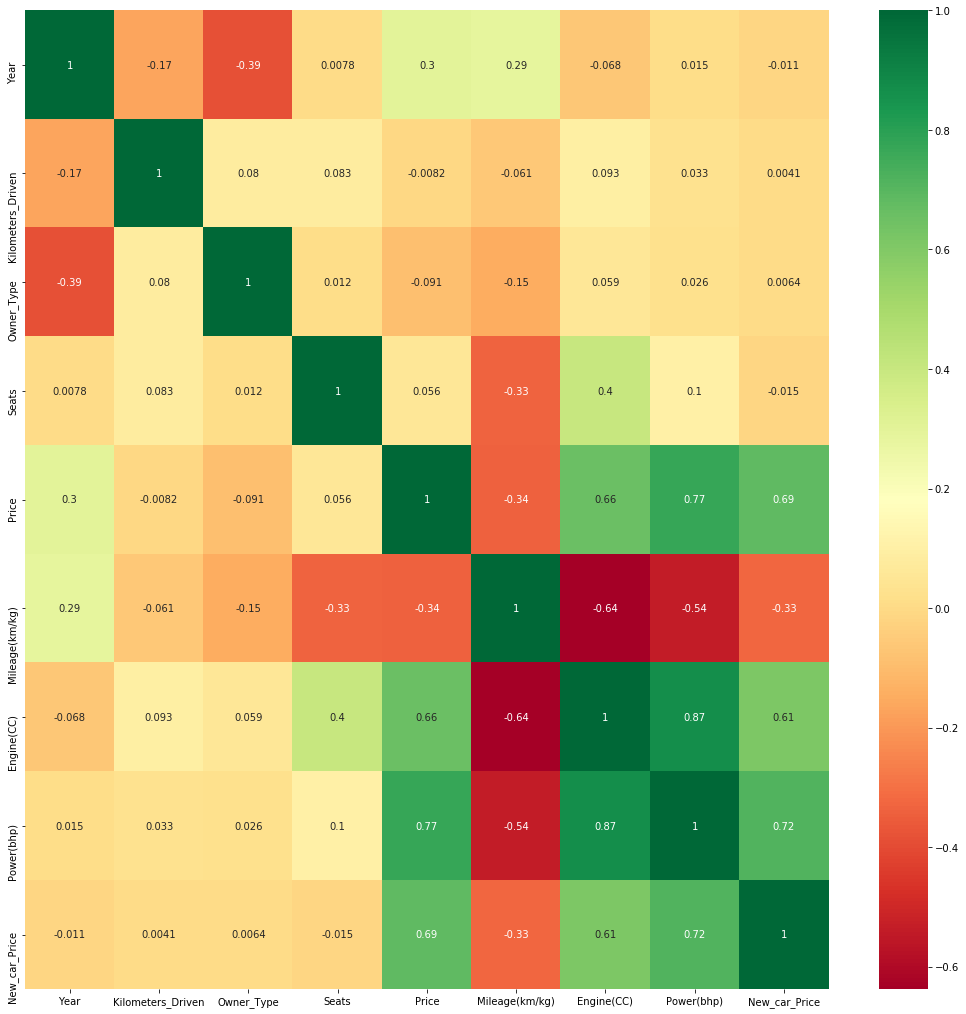

In [66]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

<h3>Train test split</h3>

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

<h3>Linear Regression</h3>

In [68]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,y_train)
predict = lg.predict(X_test)
print('Accuracy on training set: ',lg.score(X_train,y_train))
print('Accuracy on training set: ',lg.score(X_test,y_test))

Accuracy on training set:  0.7157759492444065
Accuracy on training set:  0.6771130107474821


<h3>Random Forest Regressor</h3>

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Accuracy on training set: ',rf.score(X_train,y_train))
print('Accuracy on training set: ',rf.score(X_test,y_test))

Accuracy on training set:  0.9855828942320518
Accuracy on training set:  0.8746040383664575


In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, rf_pred))

		Error Table
Mean Absolute Error      :  1.5861818578725477
Mean Squared  Error      :  13.650023425672018
Root Mean Squared  Error :  3.6945938106471212
R Squared Error          :  0.8746040383664575
